In [47]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [48]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [49]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [50]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [73]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),      # Flatten the 28x28 images to 1D array
    tf.keras.layers.Dense(128, activation='relu'),      # Dense layer with 128 neurons, ReLU activation
    tf.keras.layers.Dense(10, activation='softmax')     # Output layer with 10 neurons (for 10 classes), softmax activation
])

In [74]:
optimizer = keras.optimizers.SGD(clipvalue = 1.0)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [75]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
  31/1875 [..............................] - ETA: 6s - loss: 2.1183 - accuracy: 0.2500

2024-02-26 19:38:11.403249: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


1875/1875 [==============================] - 7s 4ms/step - loss: 0.7483 - accuracy: 0.7529 - val_loss: 0.5748 - val_accuracy: 0.8043
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5232 - accuracy: 0.8220 - val_loss: 0.5230 - val_accuracy: 0.8201
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4832 - accuracy: 0.8337 - val_loss: 0.4996 - val_accuracy: 0.8272
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4628 - accuracy: 0.8398 - val_loss: 0.4860 - val_accuracy: 0.8291
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4510 - accuracy: 0.8450 - val_loss: 0.4743 - val_accuracy: 0.8349
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4413 - accuracy: 0.8477 - val_loss: 0.4723 - val_accuracy: 0.8344
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4370 - accuracy: 0.8493 - val_loss: 0.4715 - val_accuracy: 0.8345
Epo

In [76]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.4574 - accuracy: 0.8394
Test accuracy: 0.8393999934196472


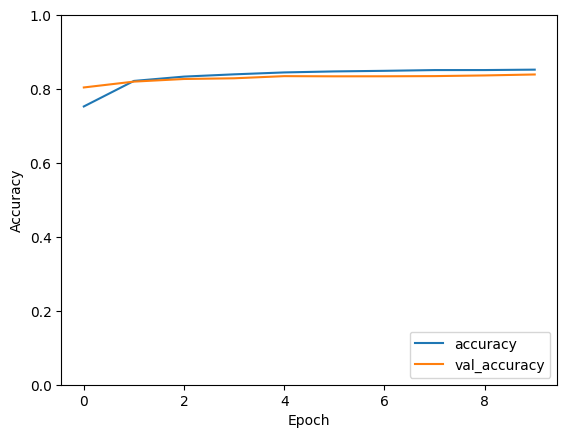

In [77]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [78]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


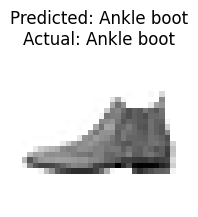

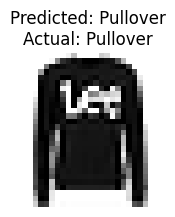

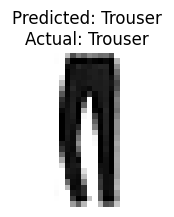

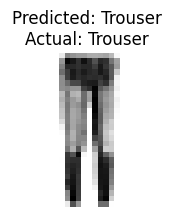

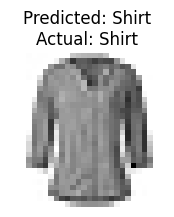

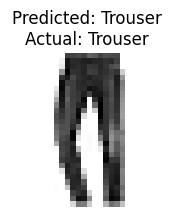

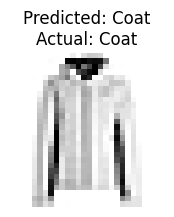

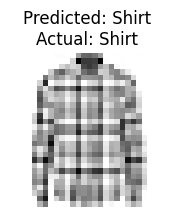

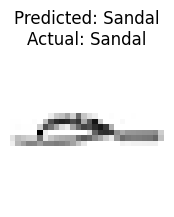

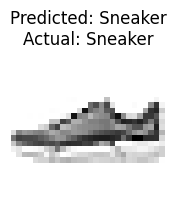

In [79]:
for i in range(10):
    plt.figure(figsize=(2, 2))
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.title(f"Predicted: {class_names[predictions[i].argmax()]}\nActual: {class_names[test_labels[i]]}")
    plt.axis('off')
    plt.show()